In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

### Clean Data

In [134]:
DIRECTORY = os.getcwd() + '/data-tech-challenge'

In [135]:
plane_data_df = pd.read_csv(DIRECTORY + '/data/plane_data.csv')
plane_data_df.rename(columns={
    'Month': 'Date'
}, inplace=True)
plane_data_df['Date'] = pd.to_datetime(plane_data_df['Date'], format='%b-%y')

display(plane_data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    9999 non-null   datetime64[ns]
 1   AustralianPort          9999 non-null   object        
 2   ForeignPort             9999 non-null   object        
 3   Country                 9999 non-null   object        
 4   Passengers_In           9999 non-null   int64         
 5   Freight_In_(tonnes)     9999 non-null   float64       
 6   Mail_In_(tonnes)        9999 non-null   float64       
 7   Passengers_Out          9999 non-null   int64         
 8   Freight_Out_(tonnes)    9999 non-null   float64       
 9   Mail_Out_(tonnes)       9999 non-null   float64       
 10  Passengers_Total        9999 non-null   int64         
 11  Freight_Total_(tonnes)  9999 non-null   float64       
 12  Mail_Total_(tonnes)     9999 non-null   float64 

None

In [136]:
print(plane_data_df.isnull().sum())

Date                      0
AustralianPort            0
ForeignPort               0
Country                   0
Passengers_In             0
Freight_In_(tonnes)       0
Mail_In_(tonnes)          0
Passengers_Out            0
Freight_Out_(tonnes)      0
Mail_Out_(tonnes)         0
Passengers_Total          0
Freight_Total_(tonnes)    0
Mail_Total_(tonnes)       0
Year                      0
Month_num                 0
dtype: int64


In [137]:
# mismatches ?
mismatch_passengers = plane_data_df['Passengers_Total'] != (plane_data_df['Passengers_In'] + plane_data_df['Passengers_Out'])

mismatch_freight = ~np.isclose(
    plane_data_df['Freight_Total_(tonnes)'],
    plane_data_df['Freight_In_(tonnes)'] + plane_data_df['Freight_Out_(tonnes)'],
    atol=0.01
)

mismatch_mail = ~np.isclose(
    plane_data_df['Mail_Total_(tonnes)'],
    plane_data_df['Mail_In_(tonnes)'] + plane_data_df['Mail_Out_(tonnes)'],
    atol=0.01
)

print("Passenger mismatches:", mismatch_passengers.sum())
print("Freight mismatches:", mismatch_freight.sum())
print("Mail mismatches:", mismatch_mail.sum())


Passenger mismatches: 0
Freight mismatches: 0
Mail mismatches: 0


In [138]:
all_zero = (
    (plane_data_df['Passengers_Total'] == 0) &
    (plane_data_df['Freight_Total_(tonnes)'] == 0) &
    (plane_data_df['Mail_Total_(tonnes)'] == 0)
)

print("rows with all totals = 0:", all_zero.sum())

plane_data_df = plane_data_df[~all_zero]


rows with all totals = 0: 10


In [139]:
passengers_zero = (
    (plane_data_df['Passengers_Total'] == 0)
)

print("rows with all totals = 0:", passengers_zero.sum())

plane_data_df = plane_data_df[~passengers_zero]



rows with all totals = 0: 34


In [140]:
plane_data_df.describe()

,Date,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
count,9955,9955.000000,9955.000000,9955.000000,9955.000000,9955.000000,9955.000000,9955.000000,9955.000000,9955.000000,9955.000000,9955.000000
mean,1987-04-17 14:13:52.466097408,1496.579106,57.830282,1.331872,1446.199699,66.597776,2.074234,2942.778805,124.428058,3.406105,1986.860372,6.195982
min,1985-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1985.000000,1.000000
25%,1986-04-01 00:00:00,47.000000,0.000000,0.000000,53.000000,0.000000,0.000000,105.000000,0.054000,0.000000,1986.000000,3.000000
50%,1987-05-01 00:00:00,337.000000,2.188000,0.000000,330.000000,5.315000,0.010000,673.000000,13.262000,0.043000,1987.000000,6.000000
75%,1988-06-01 00:00:00,1596.500000,42.307500,0.226000,1547.500000,58.922000,1.066500,3152.000000,94.483000,1.527500,1988.000000,9.000000
max,1989-07-01 00:00:00,37754.000000,1795.482000,110.518000,38475.000000,1899.032000,103.111000,70014.000000,3242.982000,197.697000,1989.000000,12.000000
std,NaN,3106.912589,150.787916,5.747997,3070.650966,166.152632,6.506484,6141.052098,298.103202,10.420358,1.299755,3.444071


In [141]:
# put cleaned data into csv file
cleaned_file_path = DIRECTORY + '/data/plane_data_cleaned.csv'
plane_data_df.to_csv(cleaned_file_path, index=False)

In [142]:
print(plane_data_df.columns)

Index(['Date', 'AustralianPort', 'ForeignPort', 'Country', 'Passengers_In',
       'Freight_In_(tonnes)', 'Mail_In_(tonnes)', 'Passengers_Out',
       'Freight_Out_(tonnes)', 'Mail_Out_(tonnes)', 'Passengers_Total',
       'Freight_Total_(tonnes)', 'Mail_Total_(tonnes)', 'Year', 'Month_num'],
      dtype='object')


In [143]:
# create route column 
plane_data_df['Route'] = plane_data_df['AustralianPort'] + ' - ' + plane_data_df['ForeignPort']

# group df by route and sum passengers to identify most frequented routes
route_traffic = plane_data_df.groupby('Route')['Passengers_Total'].sum().sort_values(ascending=False)

print(f"Total # routes: {len(route_traffic)}\n")

print("Top 10 trafficked routes")
print(route_traffic.head(10))

print("\nBottom 10 trafficked routes")
print(route_traffic.tail(10))


Total # routes: 301

Top 10 trafficked routes
Route
Sydney - Auckland        2961212
Sydney - Singapore       1440018
Sydney - Tokyo           1292116
Sydney - Hong Kong       1151900
Perth - Singapore         952926
Brisbane - Auckland       893246
Sydney - Christchurch     882357
Melbourne - Singapore     865251
Sydney - Los Angeles      862964
Sydney - Honolulu         861814
Name: Passengers_Total, dtype: int64

Bottom 10 trafficked routes
Route
Cairns - Larnaca              4
Cairns - Belgrade             3
Adelaide - Jakarta            3
Hobart - Denpasar             3
Hobart - Los Angeles          2
Perth - Port Moresby          2
Hobart - Tokyo                1
Darwin - Zagreb               1
Townsville - San Francisco    1
Cairns - Honiara              1
Name: Passengers_Total, dtype: int64


In [144]:
# create route column 
plane_data_df['Route Based on Country'] = plane_data_df['AustralianPort'] + ' - ' + plane_data_df['Country']

# group df by route and sum passengers to identify most frequented routes
route_country_traffic = plane_data_df.groupby('Route Based on Country')['Passengers_Total'].sum().sort_values(ascending=False)

print(f"Total # routes grouped by country: {len(route_country_traffic)}\n")

print("Top 10 trafficked routes")
print(route_country_traffic.head(10))

print("\nBottom 10 trafficked routes")
print(route_country_traffic.tail(10))


Total # routes grouped by country: 219

Top 10 trafficked routes
Route Based on Country
Sydney - New Zealand       4385166
Sydney - USA               2126018
Sydney - Singapore         1440018
Brisbane - New Zealand     1437186
Melbourne - New Zealand    1370726
Sydney - Japan             1346386
Sydney - Hong Kong         1151900
Perth - Singapore           952926
Melbourne - Singapore       865251
Sydney - UK                 708987
Name: Passengers_Total, dtype: int64

Bottom 10 trafficked routes
Route Based on Country
Perth - Philippines         7
Darwin - Japan              6
Townsville - Fiji           6
Adelaide - Cyprus           6
Cairns - Cyprus             4
Cairns - Yugoslavia         3
Hobart - Indonesia          3
Perth - Papua New Guinea    2
Hobart - Japan              1
Cairns - Solomon Islands    1
Name: Passengers_Total, dtype: int64


In [145]:
# group df by route and sum passengers to identify most frequented routes
route_country_destination_traffic = plane_data_df.groupby('Country')['Passengers_Total'].sum().sort_values(ascending=False)

print(f"Total # routes grouped by country: {len(route_country_destination_traffic)}\n")

print("Top 10 trafficked countries")
print(route_country_destination_traffic.head(10))

print("\nBottom 10 trafficked countries")
print(route_country_destination_traffic.tail(10))


Total # routes grouped by country: 43

Top 10 trafficked countries
Country
New Zealand    7881613
Singapore      4130761
USA            3084101
Hong Kong      2217453
Japan          1773146
UK             1729405
Indonesia      1552095
Fiji            933701
Thailand        930728
Malaysia        835317
Name: Passengers_Total, dtype: int64

Bottom 10 trafficked countries
Country
American Samoa    17187
Austria           16267
Argentina         15305
Nauru             13863
Mauritius         12724
Cook Islands      11537
Guam               5250
Cyprus             1337
Denmark             632
Malta               165
Name: Passengers_Total, dtype: int64


In [146]:
# group df by region and sum passengers to identify most frequented 
route_traffic_in = plane_data_df.groupby('Route')['Passengers_In'].sum().sort_values(ascending=False)

print("Top 10 trafficked regions in terms of passengers in")
print(route_traffic_in.head(15))

print("\nBottom 10 trafficked regions in terms of passengers in")
print(route_traffic_in.tail(15))

Top 10 trafficked regions in terms of passengers in
Route
Sydney - Auckland        1486050
Sydney - Singapore        744562
Sydney - Hong Kong        612428
Sydney - Tokyo            588121
Perth - Singapore         487258
Melbourne - Singapore     454823
Sydney - Christchurch     454649
Sydney - Honolulu         439333
Brisbane - Auckland       438887
Sydney - Los Angeles      420215
Melbourne - Auckland      396067
Melbourne - Hong Kong     348813
Sydney - London           328487
Sydney - Nadi             301980
Sydney - Wellington       271318
Name: Passengers_In, dtype: int64

Bottom 10 trafficked regions in terms of passengers in
Route
Melbourne - Buenos Aires    0
Sydney - Ljubljana          0
Hobart - Tokyo              0
Sydney - Malta              0
Darwin - Zagreb             0
Darwin - Larnaca            0
Darwin - Kuala Lumpur       0
Darwin - Copenhagen         0
Cairns - Wellington         0
Cairns - Papeete            0
Cairns - Nagoya             0
Sydney - Copenhagen  

In [147]:
# group df by region and sum passengers to identify most frequented regions
route_traffic_out = plane_data_df.groupby('Route')['Passengers_Out'].sum().sort_values(ascending=False)

print("Top 10 trafficked routes in terms of passengers out")
print(route_traffic_out.head(15))

print("\nBottom 10 trafficked routes in terms of passengers out")
print(route_traffic_out.tail(15))

Top 10 trafficked routes in terms of passengers out
Route
Sydney - Auckland        1475162
Sydney - Tokyo            703995
Sydney - Singapore        695456
Sydney - Hong Kong        539472
Perth - Singapore         465668
Brisbane - Auckland       454359
Sydney - Los Angeles      442749
Sydney - Christchurch     427708
Sydney - Honolulu         422481
Melbourne - Singapore     410428
Melbourne - Auckland      389365
Sydney - London           341090
Sydney - Nadi             312184
Melbourne - Hong Kong     278049
Sydney - Wellington       270239
Name: Passengers_Out, dtype: int64

Bottom 10 trafficked routes in terms of passengers out
Route
Townsville - Manila           0
Perth - New York              0
Adelaide - Dubai              0
Townsville - San Francisco    0
Townsville - Los Angeles      0
Sydney - Seattle              0
Townsville - Honolulu         0
Perth - Manila                0
Melbourne - Chicago           0
Brisbane - Muscat             0
Hobart - Singapore            

In [148]:
# top 25 routes by total passengers
top_25_routes = route_traffic.head(25).index

# dataframe with in/out/total for top 25 routes
top_routes_data = []
for route in top_25_routes:
    route_data = plane_data_df[plane_data_df['Route'] == route]
    passengers_in = route_data['Passengers_In'].sum()
    passengers_out = route_data['Passengers_Out'].sum()
    passengers_total = route_data['Passengers_Total'].sum()
    freight_total = route_data['Freight_Total_(tonnes)'].sum()
    mail_total = route_data['Mail_Total_(tonnes)'].sum()
    
    top_routes_data.append({
        'Route': route,
        'Passengers_In': passengers_in,
        'Passengers_Out': passengers_out,
        'Passengers_Total': passengers_total,
        'Freight_Total_(tonnes)': freight_total,
        'Mail_Total_(tonnes)': mail_total
    })

top_routes_df = pd.DataFrame(top_routes_data)

print("Analysis of inbound/outbound:")
for _, row in top_routes_df.iterrows():
    route_name = row['Route'].split(' - ')[1]
    balance = row['Passengers_In'] - row['Passengers_Out']
    balance_pct = (balance / row['Passengers_Total']) * 100
    
    if balance > 0:
        flow_type = "More Inbound"
    elif balance < 0:
        flow_type = "More Outbound"
    else:
        flow_type = "50/50 split"
    
    print(f"{route_name:<20} | {flow_type:<15} | Balance: {balance:>8,} ({balance_pct:>6.1f}%)")

Analysis of inbound/outbound:
Auckland             | More Inbound    | Balance:   10,888 (   0.4%)
Singapore            | More Inbound    | Balance:   49,106 (   3.4%)
Tokyo                | More Outbound   | Balance: -115,874 (  -9.0%)
Hong Kong            | More Inbound    | Balance:   72,956 (   6.3%)
Singapore            | More Inbound    | Balance:   21,590 (   2.3%)
Auckland             | More Outbound   | Balance:  -15,472 (  -1.7%)
Christchurch         | More Inbound    | Balance:   26,941 (   3.1%)
Singapore            | More Inbound    | Balance:   44,395 (   5.1%)
Los Angeles          | More Outbound   | Balance:  -22,534 (  -2.6%)
Honolulu             | More Inbound    | Balance:   16,852 (   2.0%)
Auckland             | More Inbound    | Balance:    6,702 (   0.9%)
London               | More Outbound   | Balance:  -12,603 (  -1.9%)
Hong Kong            | More Inbound    | Balance:   70,764 (  11.3%)
Nadi                 | More Outbound   | Balance:  -10,204 (  -1.7%)
Well

In [149]:
# top 25 routes based on country by total passengers
top_25_routes_based_on_country = route_country_destination_traffic.head(25).index

# dataframe with in/out/total for top 25 routes
top_routes_by_country_data = []
for country in top_25_routes_based_on_country:  # Changed 'route' to 'country' for clarity
    route_data = plane_data_df[plane_data_df['Country'] == country]  # Fixed: use 'Country' column directly
    passengers_in = route_data['Passengers_In'].sum()
    passengers_out = route_data['Passengers_Out'].sum()
    passengers_total = route_data['Passengers_Total'].sum()
    freight_total = route_data['Freight_Total_(tonnes)'].sum()
    mail_total = route_data['Mail_Total_(tonnes)'].sum()
    
    top_routes_by_country_data.append({
        'Country': country,  # Changed to 'Country' to match what we're actually storing
        'Passengers_In': passengers_in,
        'Passengers_Out': passengers_out,
        'Passengers_Total': passengers_total,
        'Freight_Total_(tonnes)': freight_total,
        'Mail_Total_(tonnes)': mail_total
    })

top_routes_by_country_data = pd.DataFrame(top_routes_by_country_data)

print("Analysis of inbound/outbound by country:")
for _, row in top_routes_by_country_data.iterrows():
    route_name = row['Country']  # Now this will work correctly
    balance = row['Passengers_In'] - row['Passengers_Out']
    balance_pct = (balance / row['Passengers_Total']) * 100
    
    if balance > 0:
        flow_type = "More Inbound"
    elif balance < 0:
        flow_type = "More Outbound"
    else:
        flow_type = "50/50 split"
    
    print(f"{route_name:<20} | {flow_type:<15} | Balance: {balance:>8,} ({balance_pct:>6.1f}%)")

Analysis of inbound/outbound by country:
New Zealand          | More Inbound    | Balance:   93,973 (   1.2%)
Singapore            | More Inbound    | Balance:  163,055 (   3.9%)
USA                  | More Inbound    | Balance:   15,485 (   0.5%)
Hong Kong            | More Inbound    | Balance:  172,091 (   7.8%)
Japan                | More Inbound    | Balance:    2,008 (   0.1%)
UK                   | More Outbound   | Balance:  -32,899 (  -1.9%)
Indonesia            | More Inbound    | Balance:   18,237 (   1.2%)
Fiji                 | More Outbound   | Balance:   -6,219 (  -0.7%)
Thailand             | More Outbound   | Balance:   -5,356 (  -0.6%)
Malaysia             | More Inbound    | Balance:   10,637 (   1.3%)
Philippines          | More Inbound    | Balance:   50,314 (   8.8%)
Papua New Guinea     | More Inbound    | Balance:      264 (   0.1%)
Greece               | More Inbound    | Balance:      116 (   0.0%)
Germany              | More Inbound    | Balance:    3,720 (  

In [150]:
# top 25 routes by region by total passengers
top_25_region_routes = route_traffic.head(25).index

# dataframe with in/out/total for top 25 routes
top_routes_data = []
for route in top_25_routes:
    route_data = plane_data_df[plane_data_df['Route'] == route]
    passengers_in = route_data['Passengers_In'].sum()
    passengers_out = route_data['Passengers_Out'].sum()
    passengers_total = route_data['Passengers_Total'].sum()
    freight_total = route_data['Freight_Total_(tonnes)'].sum()
    mail_total = route_data['Mail_Total_(tonnes)'].sum()
    
    top_routes_data.append({
        'Route': route_data['Route Based on Country'].iloc[0],
        'Passengers_In': passengers_in,
        'Passengers_Out': passengers_out,
        'Passengers_Total': passengers_total,
        'Freight_Total_(tonnes)': freight_total,
        'Mail_Total_(tonnes)': mail_total
    })

top_routes_by_country_data_df = pd.DataFrame(top_routes_data)

print("Analysis of inbound/outbound:")
for _, row in top_routes_by_country_data_df.iterrows():
    route_name = row['Route']
    balance = row['Passengers_In'] - row['Passengers_Out']
    balance_pct = (balance / row['Passengers_Total']) * 100
    
    if balance > 0:
        flow_type = "More Inbound"
    elif balance < 0:
        flow_type = "More Outbound"
    else:
        flow_type = "50/50 split"
    
    print(f"{route_name:<30} | {flow_type:<15} | Balance: {balance:>8,} ({balance_pct:>6.1f}%)")

Analysis of inbound/outbound:
Sydney - New Zealand           | More Inbound    | Balance:   10,888 (   0.4%)
Sydney - Singapore             | More Inbound    | Balance:   49,106 (   3.4%)
Sydney - Japan                 | More Outbound   | Balance: -115,874 (  -9.0%)
Sydney - Hong Kong             | More Inbound    | Balance:   72,956 (   6.3%)
Perth - Singapore              | More Inbound    | Balance:   21,590 (   2.3%)
Brisbane - New Zealand         | More Outbound   | Balance:  -15,472 (  -1.7%)
Sydney - New Zealand           | More Inbound    | Balance:   26,941 (   3.1%)
Melbourne - Singapore          | More Inbound    | Balance:   44,395 (   5.1%)
Sydney - USA                   | More Outbound   | Balance:  -22,534 (  -2.6%)
Sydney - USA                   | More Inbound    | Balance:   16,852 (   2.0%)
Melbourne - New Zealand        | More Inbound    | Balance:    6,702 (   0.9%)
Sydney - UK                    | More Outbound   | Balance:  -12,603 (  -1.9%)
Melbourne - Hong Kong 

In [151]:
# top 25 countries by total passengers (regardless of Australian port)
top_25_countries = route_country_destination_traffic.head(25).index

# dataframe with in/out/total for top 25 countries
top_routes_by_country_data = []
for country in top_25_countries:
    country_data = plane_data_df[plane_data_df['Country'] == country]
    passengers_in = country_data['Passengers_In'].sum()
    passengers_out = country_data['Passengers_Out'].sum()
    passengers_total = country_data['Passengers_Total'].sum()
    freight_total = country_data['Freight_Total_(tonnes)'].sum()
    mail_total = country_data['Mail_Total_(tonnes)'].sum()
    
    top_routes_by_country_data.append({
        'Country': country,
        'Passengers_In': passengers_in,
        'Passengers_Out': passengers_out,
        'Passengers_Total': passengers_total,
        'Freight_Total_(tonnes)': freight_total,
        'Mail_Total_(tonnes)': mail_total
    })

top_countries_df = pd.DataFrame(top_routes_by_country_data)

print("Analysis of inbound/outbound by country (all Australian ports combined):")
for _, row in top_countries_df.iterrows():
    country_name = row['Country']
    balance = row['Passengers_In'] - row['Passengers_Out']
    balance_pct = (balance / row['Passengers_Total']) * 100
    
    if balance > 0:
        flow_type = "More Inbound"
    elif balance < 0:
        flow_type = "More Outbound"
    else:
        flow_type = "50/50 split"
    
    print(f"{country_name:<20} | {flow_type:<15} | Balance: {balance:>8,} ({balance_pct:>6.1f}%)")

Analysis of inbound/outbound by country (all Australian ports combined):
New Zealand          | More Inbound    | Balance:   93,973 (   1.2%)
Singapore            | More Inbound    | Balance:  163,055 (   3.9%)
USA                  | More Inbound    | Balance:   15,485 (   0.5%)
Hong Kong            | More Inbound    | Balance:  172,091 (   7.8%)
Japan                | More Inbound    | Balance:    2,008 (   0.1%)
UK                   | More Outbound   | Balance:  -32,899 (  -1.9%)
Indonesia            | More Inbound    | Balance:   18,237 (   1.2%)
Fiji                 | More Outbound   | Balance:   -6,219 (  -0.7%)
Thailand             | More Outbound   | Balance:   -5,356 (  -0.6%)
Malaysia             | More Inbound    | Balance:   10,637 (   1.3%)
Philippines          | More Inbound    | Balance:   50,314 (   8.8%)
Papua New Guinea     | More Inbound    | Balance:      264 (   0.1%)
Greece               | More Inbound    | Balance:      116 (   0.0%)
Germany              | More In

In [152]:
# Look at US region
us_routes = plane_data_df[plane_data_df['Country'] == 'USA']
us_routes = us_routes.groupby('Route')['Passengers_Total'].sum().sort_values(ascending=False)

print(len(us_routes))
print(us_routes)

37
Route
Sydney - Los Angeles          862964
Sydney - Honolulu             861814
Sydney - San Francisco        376766
Melbourne - Los Angeles       290993
Melbourne - Honolulu          258063
Melbourne - San Francisco      96618
Cairns - Los Angeles           54923
Cairns - Honolulu              52948
Cairns - San Francisco         50026
Brisbane - Honolulu            49197
Brisbane - Los Angeles         35779
Brisbane - San Francisco       28851
Sydney - New York              22846
Perth - San Francisco           8445
Perth - Los Angeles             8329
Perth - Honolulu                7126
Melbourne - New York            6638
Adelaide - Los Angeles          3445
Adelaide - Honolulu             2557
Adelaide - San Francisco        2480
Cairns - Seattle                 884
Sydney - Houston                 737
Sydney - Seattle                 537
Brisbane - Seattle               365
Sydney - Denver                  329
Melbourne - Houston              329
Brisbane - New York          

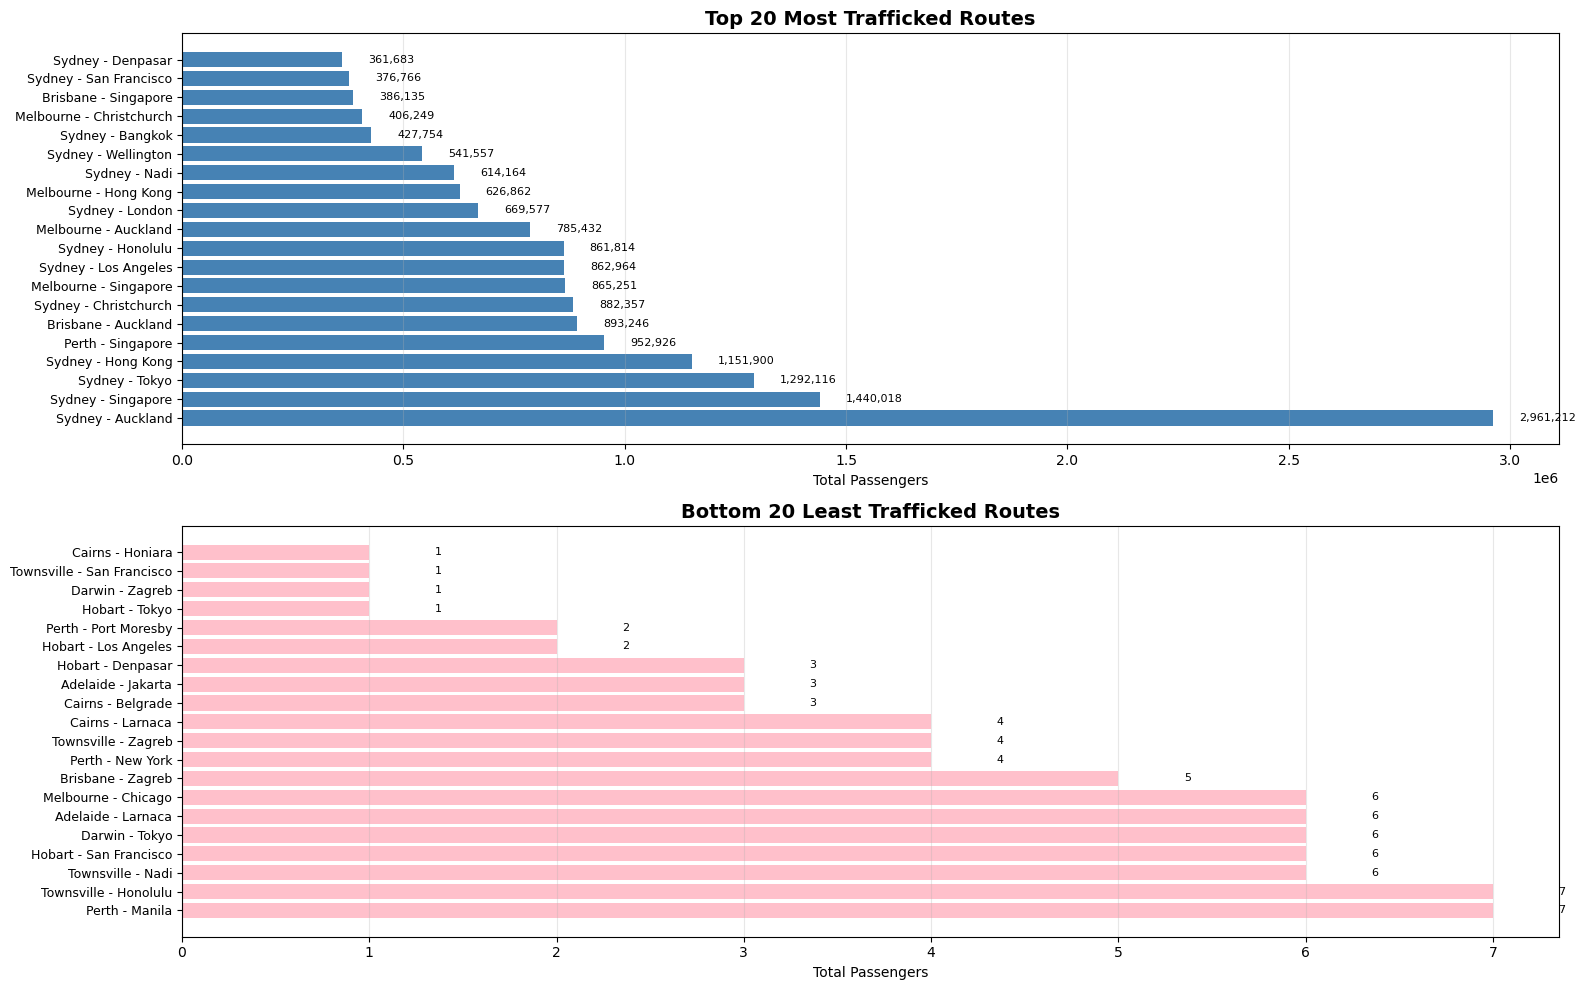

In [153]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

# top 20 routes
top_20_routes = route_traffic.head(20)
ax1.barh(range(len(top_20_routes)), top_20_routes.values, color='steelblue')
ax1.set_yticks(range(len(top_20_routes)))
ax1.set_yticklabels(top_20_routes.index, fontsize=9)
ax1.set_xlabel('Total Passengers')
ax1.set_title('Top 20 Most Trafficked Routes', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

for i, v in enumerate(top_20_routes.values):
    ax1.text(v + max(top_20_routes.values) * 0.02, i, f'{v:,.0f}', 
             va='center', fontsize=8)

# bottom 20 routes
bottom_20_routes = route_traffic.tail(20)
ax2.barh(range(len(bottom_20_routes)), bottom_20_routes.values, color='pink')
ax2.set_yticks(range(len(bottom_20_routes)))
ax2.set_yticklabels(bottom_20_routes.index, fontsize=9)
ax2.set_xlabel('Total Passengers')
ax2.set_title('Bottom 20 Least Trafficked Routes', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

for i, v in enumerate(bottom_20_routes.values):
    ax2.text(v + max(bottom_20_routes.values) * 0.05, i, f'{v:,.0f}', 
             va='center', fontsize=8)

plt.tight_layout()
plt.show()

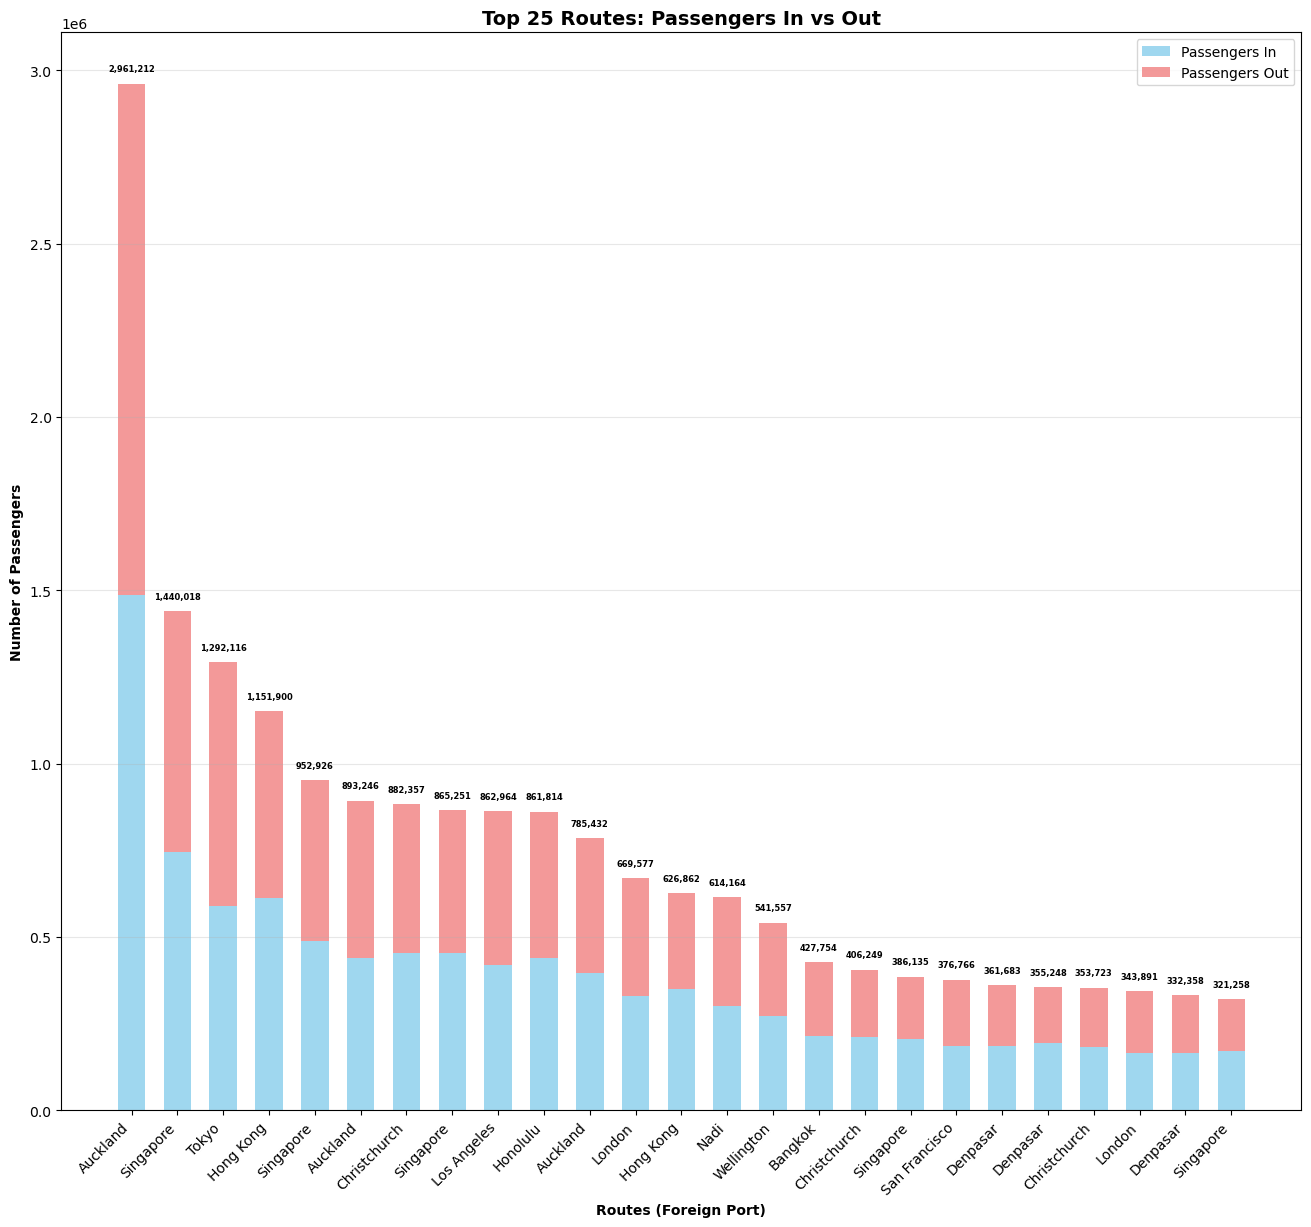

In [154]:
fig, (ax1) = plt.subplots(1, 1, figsize=(16, 14))

routes_short = [route.split(' - ')[1][:15] for route in top_routes_df['Route']]
x = np.arange(len(routes_short))
width = 0.6

bars_in = ax1.bar(x, top_routes_df['Passengers_In'], width, 
                  label='Passengers In', color='skyblue', alpha=0.8)
bars_out = ax1.bar(x, top_routes_df['Passengers_Out'], width, 
                   bottom=top_routes_df['Passengers_In'], 
                   label='Passengers Out', color='lightcoral', alpha=0.8)

ax1.set_xlabel('Routes (Foreign Port)', fontweight='bold')
ax1.set_ylabel('Number of Passengers', fontweight='bold')
ax1.set_title('Top 25 Routes: Passengers In vs Out', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(routes_short, rotation=45, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

for i, total in enumerate(top_routes_df['Passengers_Total']):
    ax1.text(i, total + max(top_routes_df['Passengers_Total']) * 0.01, 
             f'{total:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize=6)

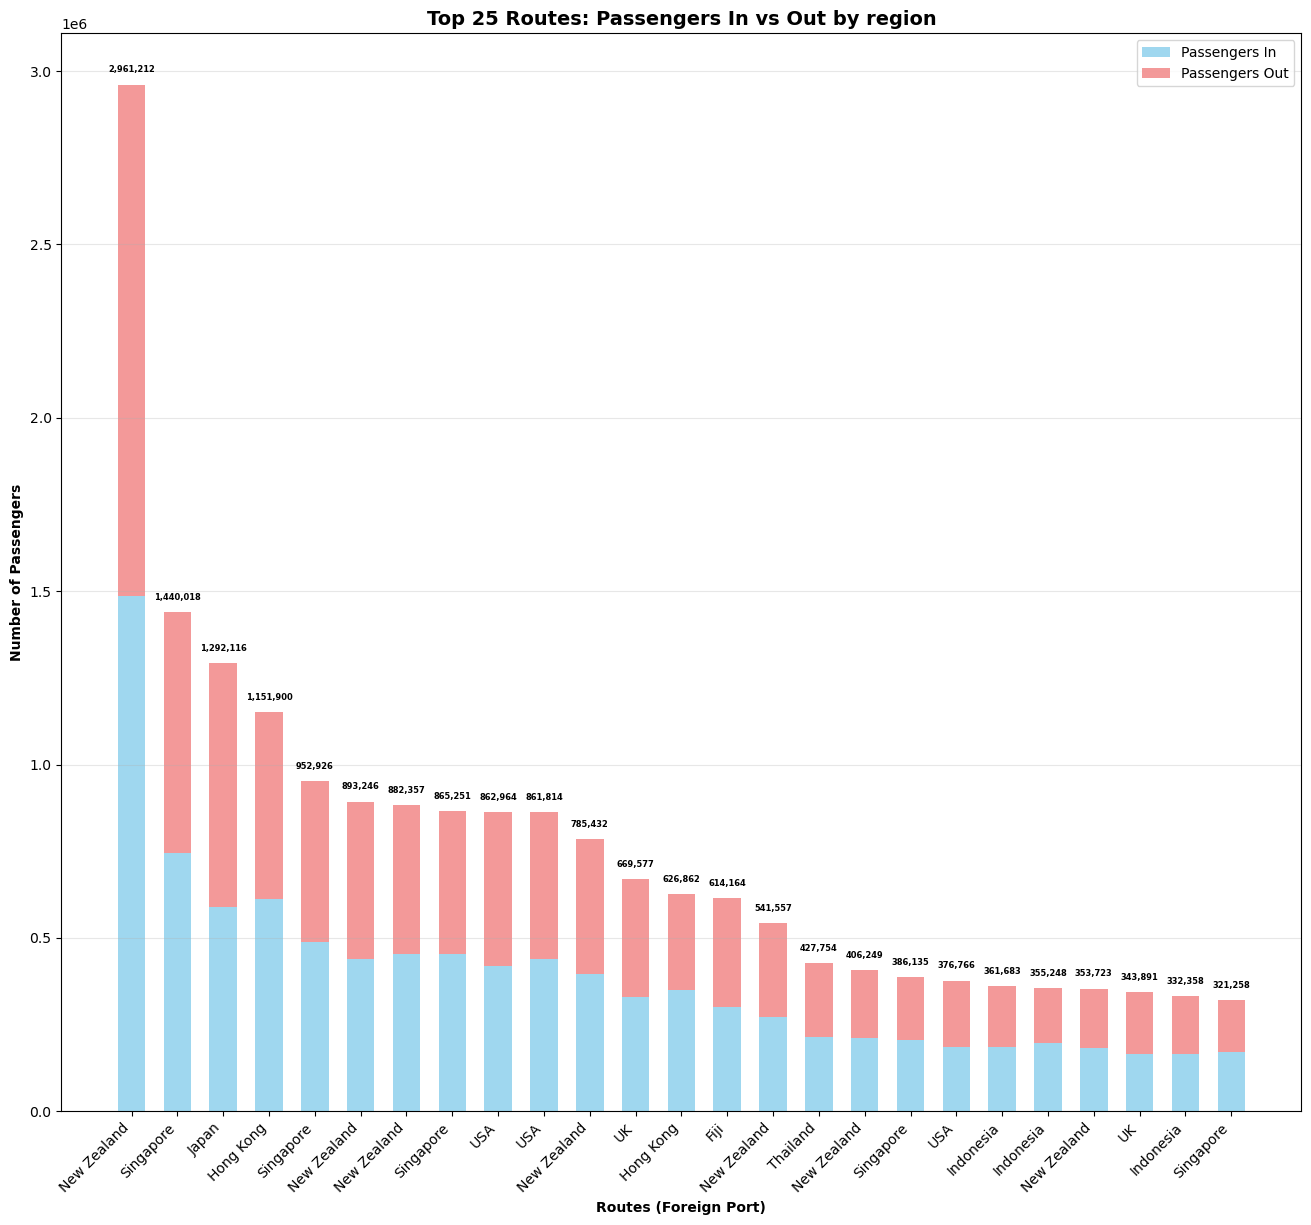

In [155]:
fig, (ax1) = plt.subplots(1, 1, figsize=(16, 14))

routes_short = [route.split(' - ')[1][:15] for route in top_routes_by_country_data_df['Route']]
x = np.arange(len(routes_short))
width = 0.6

# Create stacked bars
bars_in = ax1.bar(x, top_routes_by_country_data_df['Passengers_In'], width, 
                  label='Passengers In', color='skyblue', alpha=0.8)
bars_out = ax1.bar(x, top_routes_df['Passengers_Out'], width, 
                   bottom=top_routes_by_country_data_df['Passengers_In'], 
                   label='Passengers Out', color='lightcoral', alpha=0.8)

ax1.set_xlabel('Routes (Foreign Port)', fontweight='bold')
ax1.set_ylabel('Number of Passengers', fontweight='bold')
ax1.set_title('Top 25 Routes: Passengers In vs Out by region', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(routes_short, rotation=45, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Add total labels on top of bars
for i, total in enumerate(top_routes_by_country_data_df['Passengers_Total']):
    ax1.text(i, total + max(top_routes_by_country_data_df['Passengers_Total']) * 0.01, 
             f'{total:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize=6)

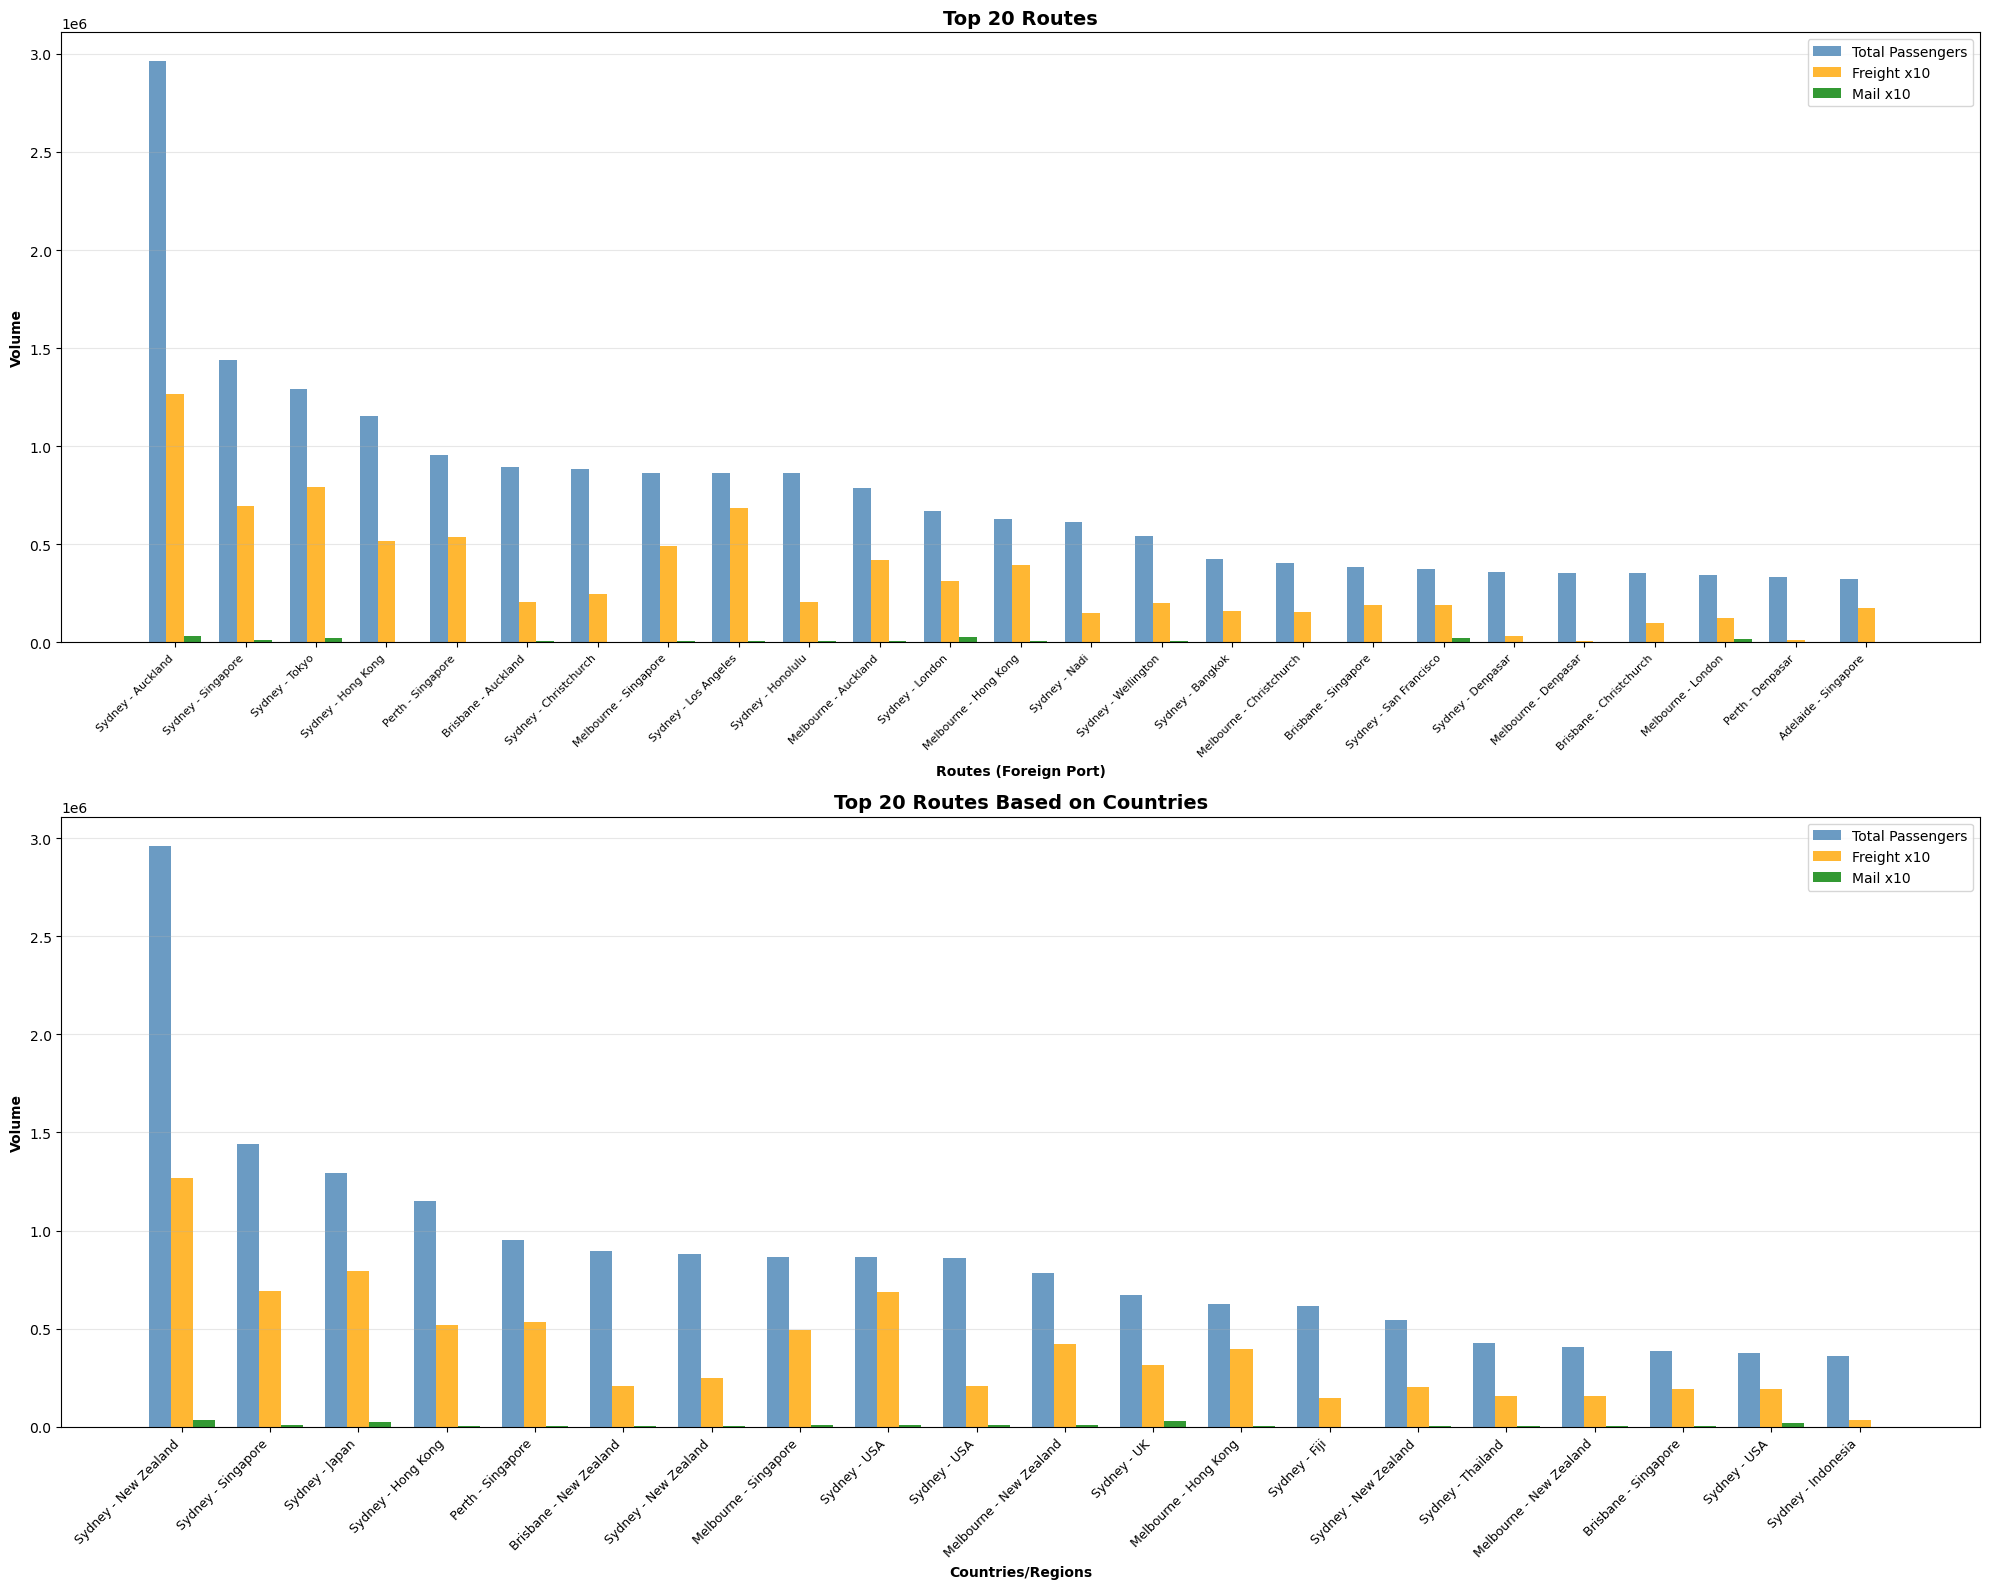

In [156]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 16))

route_names = [route for route in top_routes_df['Route']]
x = np.arange(len(route_names))
width = 0.25

bars1 = ax1.bar(x - width, top_routes_df['Passengers_Total'], width, 
                label='Total Passengers', color='steelblue', alpha=0.8)
bars2 = ax1.bar(x, top_routes_df['Freight_Total_(tonnes)'] * 10, width, 
                label='Freight x10', color='orange', alpha=0.8)
bars3 = ax1.bar(x + width, top_routes_df['Mail_Total_(tonnes)'] * 10 , width, 
                label='Mail x10', color='green', alpha=0.8)

ax1.set_xlabel('Routes (Foreign Port)', fontweight='bold')
ax1.set_ylabel('Volume', fontweight='bold')
ax1.set_title('Top 20 Routes', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(route_names, rotation=45, ha='right', fontsize=8)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

country_names = top_routes_by_country_data_df['Route'][:20]
x2 = np.arange(len(country_names))

bars4 = ax2.bar(x2 - width, top_routes_by_country_data_df['Passengers_Total'][:20], width, 
                label='Total Passengers', color='steelblue', alpha=0.8)
bars5 = ax2.bar(x2, top_routes_by_country_data_df['Freight_Total_(tonnes)'][:20] * 10, width, 
                label='Freight x10', color='orange', alpha=0.8)
bars6 = ax2.bar(x2 + width, top_routes_by_country_data_df['Mail_Total_(tonnes)'][:20] * 10, width, 
                label='Mail x10', color='green', alpha=0.8)

ax2.set_xlabel('Countries/Regions', fontweight='bold')
ax2.set_ylabel('Volume', fontweight='bold')
ax2.set_title('Top 20 Routes Based on Countries', fontsize=14, fontweight='bold')
ax2.set_xticks(x2)
ax2.set_xticklabels(country_names, rotation=45, ha='right', fontsize=9)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


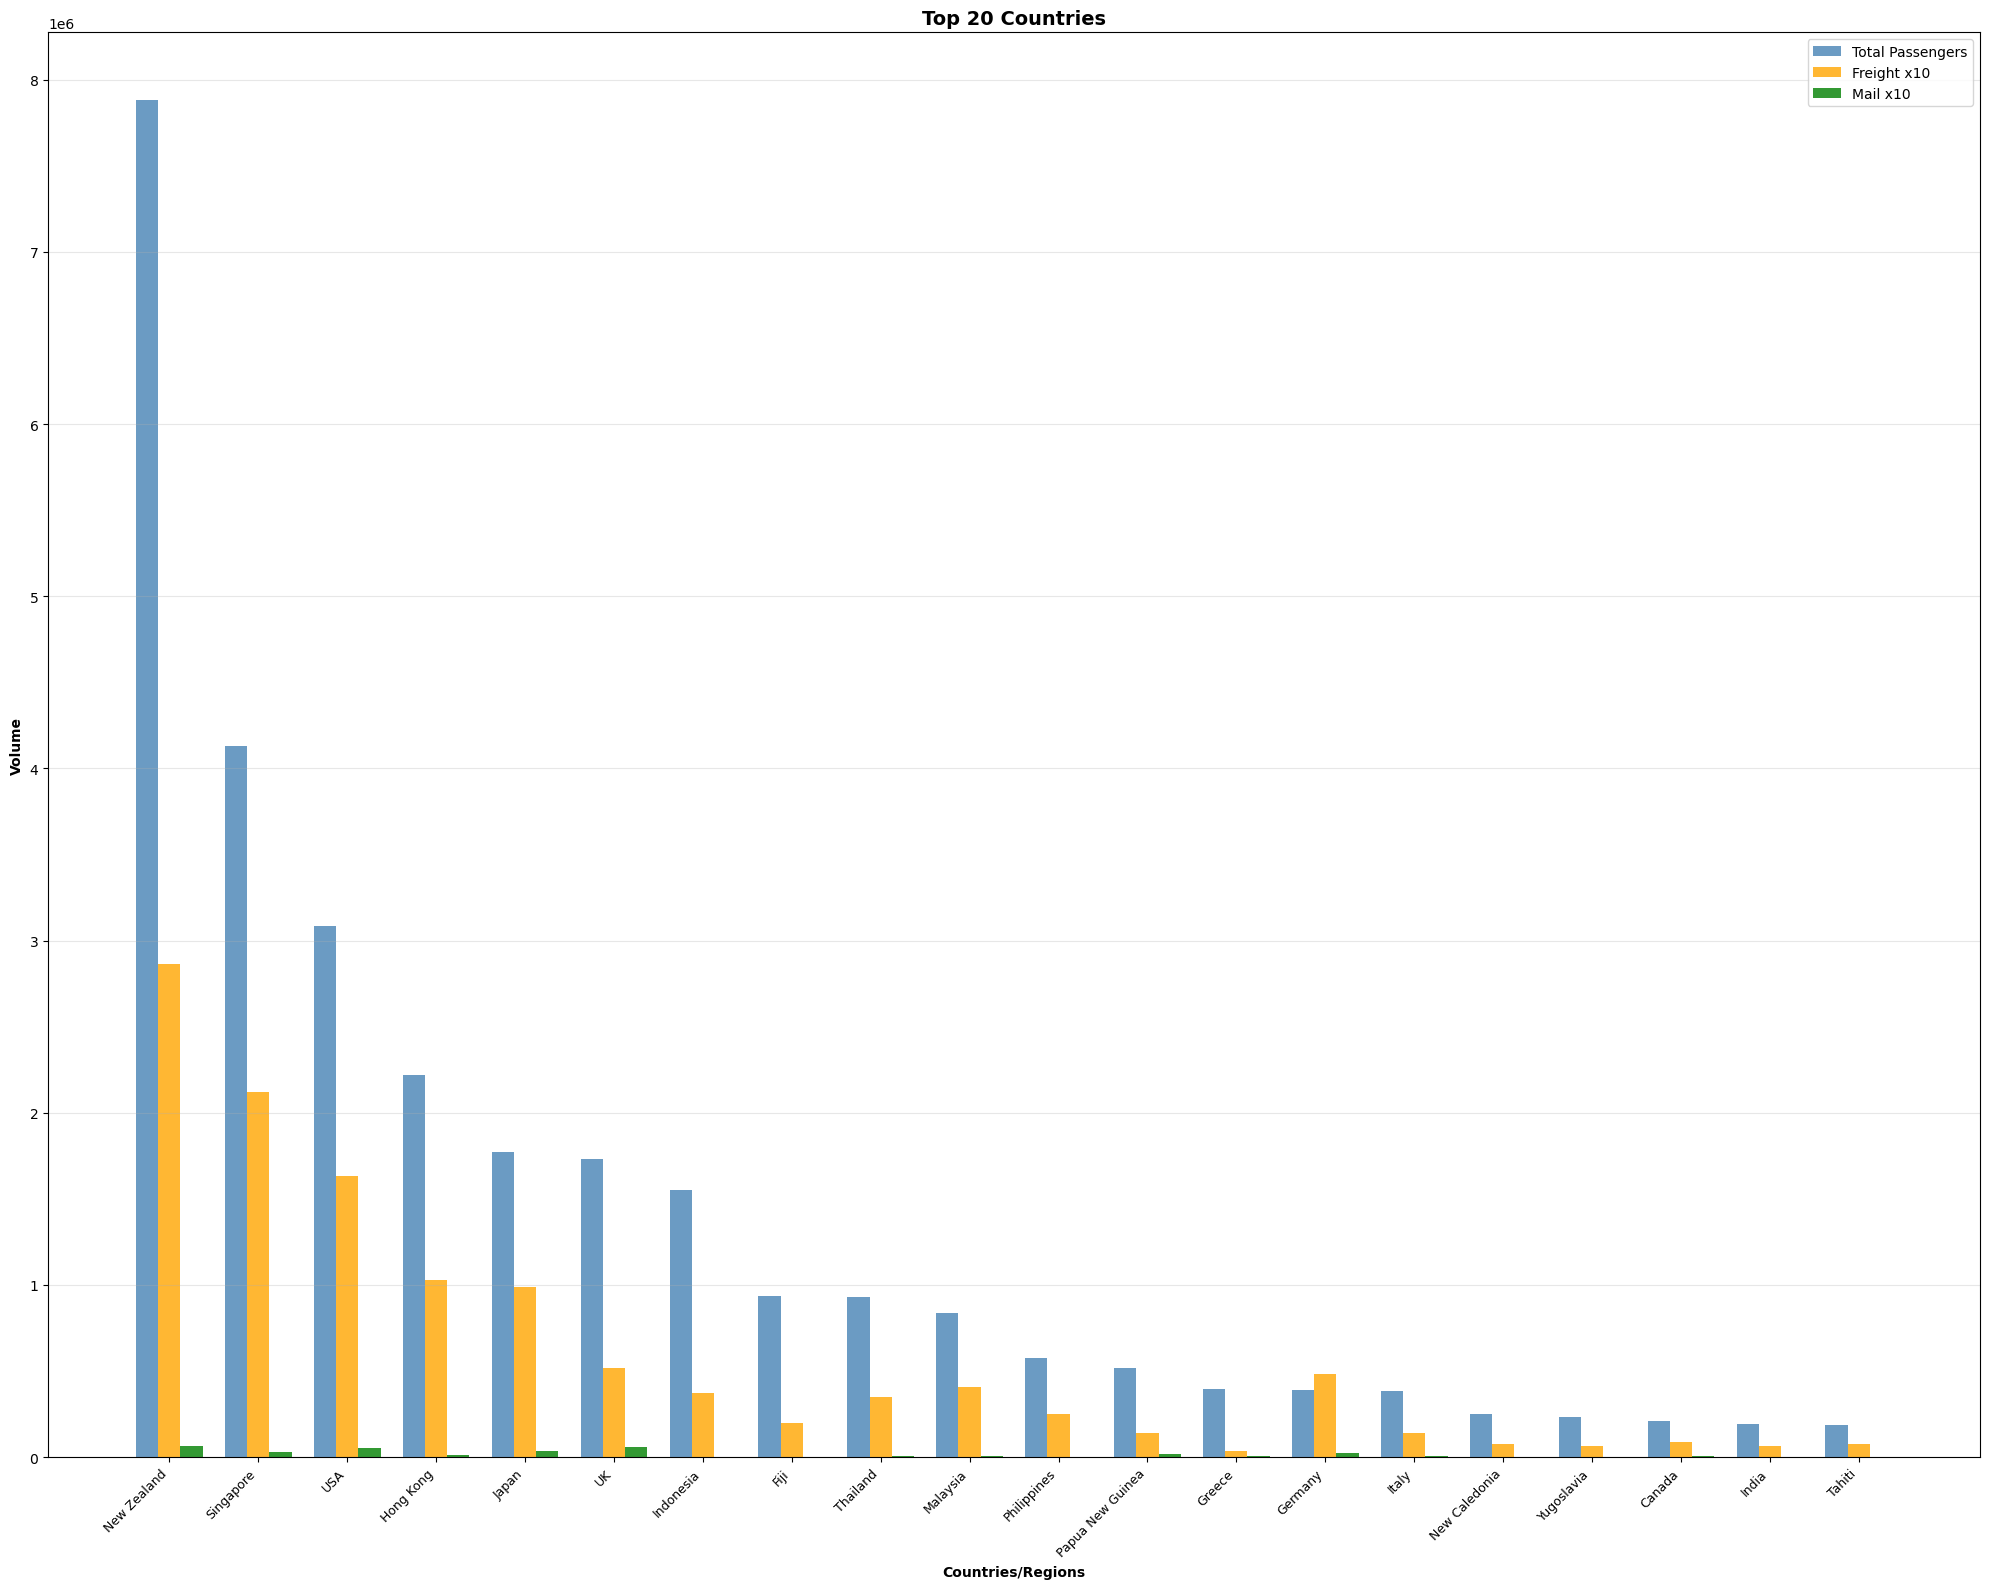

In [157]:
fig, (ax1) = plt.subplots(1, 1, figsize=(20, 16))

width = 0.25

country_names = top_countries_df['Country'][:20]
x2 = np.arange(len(country_names))

bars4 = ax1.bar(x2 - width, top_countries_df['Passengers_Total'][:20], width, 
                label='Total Passengers', color='steelblue', alpha=0.8)
bars5 = ax1.bar(x2, top_countries_df['Freight_Total_(tonnes)'][:20] * 10, width, 
                label='Freight x10', color='orange', alpha=0.8)
bars6 = ax1.bar(x2 + width, top_countries_df['Mail_Total_(tonnes)'][:20] * 10, width, 
                label='Mail x10', color='green', alpha=0.8)

ax1.set_xlabel('Countries/Regions', fontweight='bold')
ax1.set_ylabel('Volume', fontweight='bold')
ax1.set_title('Top 20 Countries', fontsize=14, fontweight='bold')
ax1.set_xticks(x2)
ax1.set_xticklabels(country_names, rotation=45, ha='right', fontsize=9)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


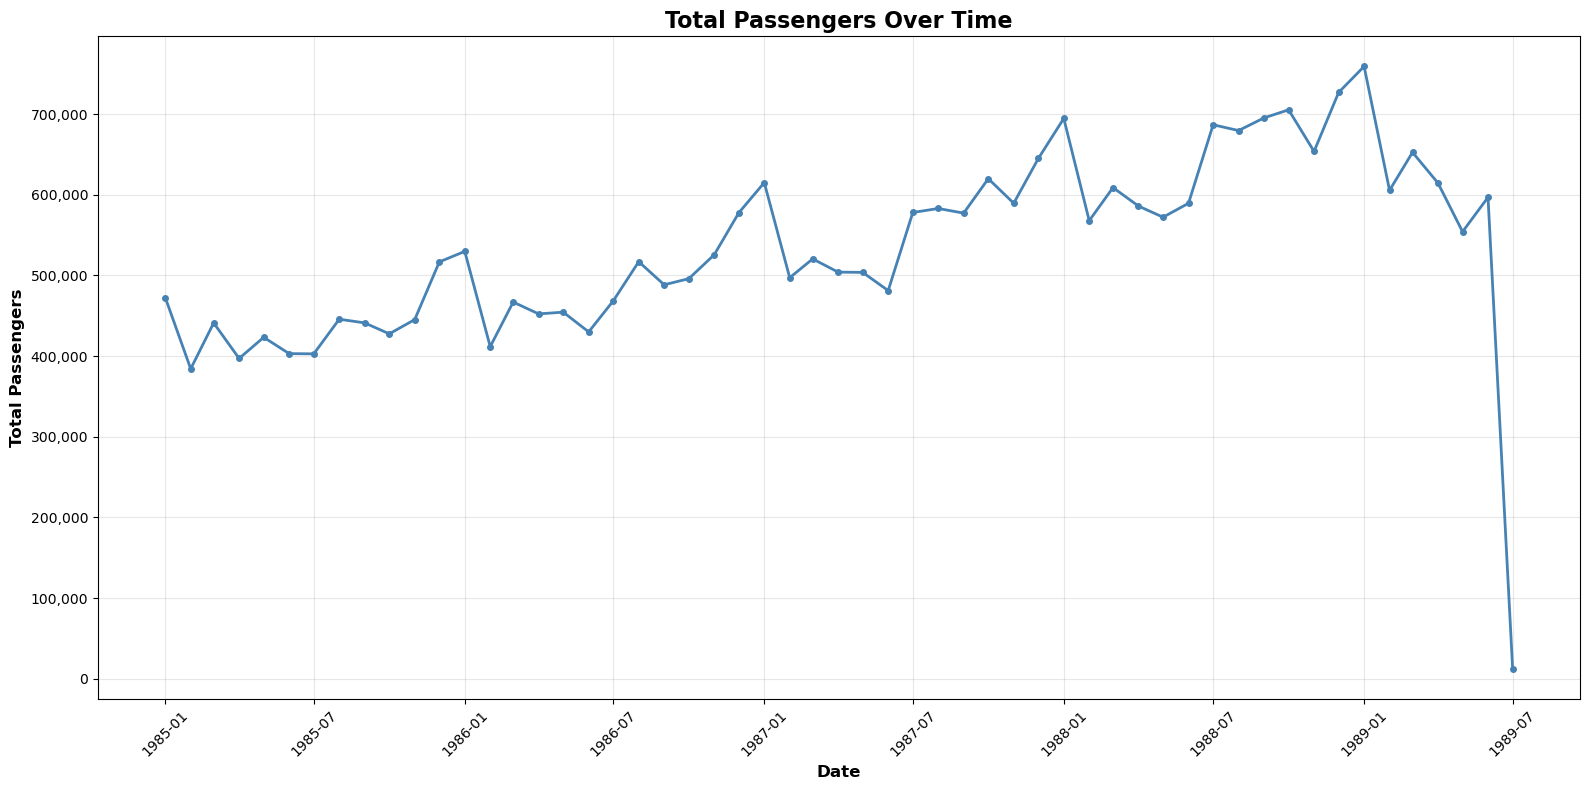

In [159]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

passengers_over_time = plane_data_df.groupby('Date')['Passengers_Total'].sum().sort_index()

ax.plot(passengers_over_time.index, passengers_over_time.values, 
        linewidth=2, color='steelblue', marker='o', markersize=4)

ax.set_xlabel('Date', fontweight='bold', fontsize=12)
ax.set_ylabel('Total Passengers', fontweight='bold', fontsize=12)
ax.set_title('Total Passengers Over Time', fontsize=16, fontweight='bold')
ax.grid(True, alpha=0.3)

ax.tick_params(axis='x', rotation=45)

# Add annotations for peak and minimum values
max_passengers = passengers_over_time.max()
min_passengers = passengers_over_time.min()
max_date = passengers_over_time.idxmax()
min_date = passengers_over_time.idxmin()

# Format y-axis with commas
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

plt.tight_layout()
plt.show()

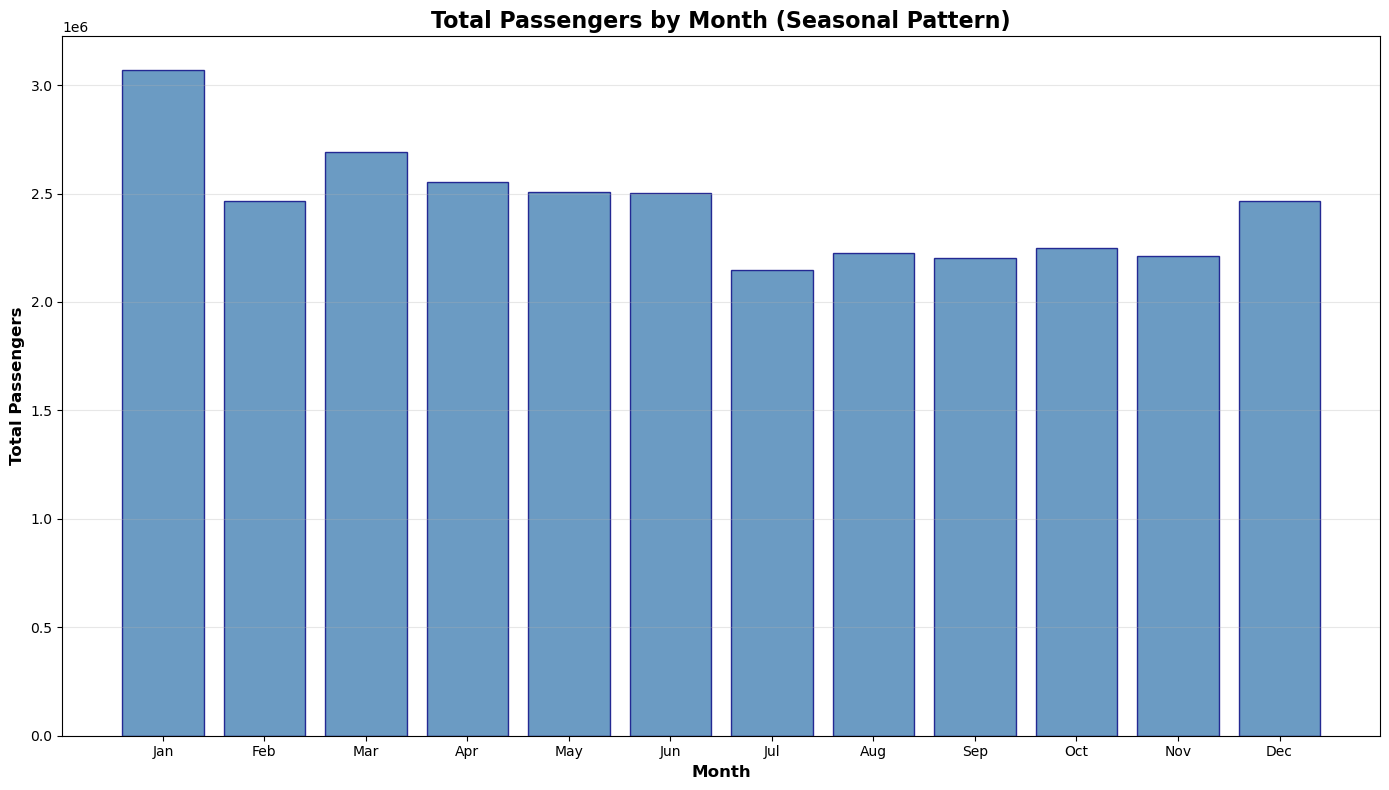

In [162]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

plane_data_df['Month'] = plane_data_df['Date'].dt.month
monthly_passengers = plane_data_df.groupby('Month')['Passengers_Total'].sum().sort_index()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

bars = ax.bar(monthly_passengers.index, monthly_passengers.values, 
              color='steelblue', alpha=0.8, edgecolor='navy', linewidth=1)

ax.set_xlabel('Month', fontweight='bold', fontsize=12)
ax.set_ylabel('Total Passengers', fontweight='bold', fontsize=12)
ax.set_title('Total Passengers by Month (Seasonal Pattern)', fontsize=16, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
ax.set_xticks(monthly_passengers.index)
ax.set_xticklabels(months)


plt.tight_layout()
plt.show()